In [701]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [702]:
columns_name = [
    'Duration', 'protocol_type', 'Service', 'Flag', 'Src_bytes', 'Dst_bytes',
    'Land', 'Wrong_fragment', 'Urgent', 'Hot', 'Num_failed_logins', 'Logged_in',
    'num_compromised', 'root_shell', 'su_attempted', 'num_root',
    'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds',
    'is_host_login', 'is_guest_login', 'Count', 'srv_count', 'serror_rate',
    'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
    'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
    'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate', 'xAttack','level'
]

# Import datasets :

In [703]:
# Train dataest
data_train  = pd.read_csv('KDDTrain+.txt', sep=',', names=columns_name)
#testing dataset
data_test = pd.read_csv('KDDTest+.txt', sep=',', names = columns_name)

In [704]:
def on_train_and_test(action):
    global data_train,data_test
    action(data_train)
    action(data_test)
# procedure     

In [705]:
def on_train_and_test1(action):
    global data_train, data_test
    data_train = action(data_train)
    data_test = action(data_test)
# function (with return )

In [706]:
def on_train_and_test2(action):
    global data_train,data_test
    action(data_train)
    action(data_test)
    action(data_train_normal)

# procedure     

# Pre-processing : 

In [707]:
def protocol_type_tcp(data):
    return data[data['protocol_type'] == 'tcp']

In [708]:
def drop_categorical_features(data):
     return data.drop(['Service', 'Flag','protocol_type'], axis=1,inplace=True)
    
content_related_features = ['Wrong_fragment', 'Urgent', 'Dst_bytes', 'Num_failed_logins', 'Src_bytes',
     'num_compromised', 'root_shell', 'su_attempted', 'num_root',
     'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds',
     'is_host_login', 'is_guest_login','level']
def drop_content_related_features(data):
     data.drop(content_related_features, axis=1,inplace=True)
    

In [709]:
on_train_and_test1(protocol_type_tcp)
on_train_and_test(drop_categorical_features)   
on_train_and_test(drop_content_related_features)   


In [710]:
data_test.head(3)

,Duration,Land,Hot,Logged_in,Count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,0,0,0,229,10,0.0,0.0,1.0,1.0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.0,1.0,neptune
1,0,0,0,0,136,1,0.0,0.0,1.0,1.0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.0,1.0,neptune
2,2,0,0,0,1,1,0.0,0.0,0.0,0.0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.0,0.0,normal


In [711]:
#  dataset train Normal 
data_train_normal =data_train[data_train['xAttack'] == 'normal']

In [712]:
Y_train=data_train.xAttack.map(lambda a: 0 if a == 'normal' else 1)
Y_test=data_test.xAttack.map(lambda a: 0 if a == 'normal' else 1)

In [713]:
def drop_label(data):
     data.drop(['xAttack'], axis=1,inplace=True)
    
on_train_and_test2(drop_label)   

In [714]:
data_train.shape

(102689, 23)

## FUNCTIONS :

### NORMALIZATION :

In [715]:
from sklearn.preprocessing import MinMaxScaler

def normalization(data):
    scaler = MinMaxScaler()
    for col in data.columns:
        data[col] = scaler.fit_transform(data[[col]])
    
    return data

### PCA :

In [716]:
from sklearn.decomposition import PCA

# def fit_pca_get_optimal_dimension(data):
#     pca = PCA()
#     pca.fit(data)
#     cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
#     optimal_dimension = np.argmax(cumulative_variance >= 0.99) + 1
    
#     return optimal_dimension

# def apply_pca(data, specified_components_num=None):
#     pca = PCA(n_components=specified_components_num)
#     transformed_data = pca.fit_transform(data)

#     if specified_components_num is None:
#         specified_components_num = fit_pca_get_optimal_dimension(data)
#         transformed_data = pca.fit_transform(data)

    
#     return pd.DataFrame(transformed_data), specified_components_num
# from sklearn.decomposition import PCA

def apply_pca(data, num_components):
    pca = PCA(n_components=num_components)
    data_pca = pca.fit_transform(data)
    data_pca_df = pd.DataFrame(data_pca)

    return data_pca_df



In [717]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import euclidean_distances

def applyCircleCorrelation(X, Xpca):
    feature_names = X.columns
    ccircle = []
    eucl_dist = []
    for i in range(len(feature_names)):
        corr1 = np.corrcoef(X.iloc[:, i], Xpca.iloc[:, 0])[0, 1]
        corr2 = np.corrcoef(X.iloc[:, i], Xpca.iloc[:, 1])[0, 1]
        ccircle.append((corr1, corr2))
        eucl_dist.append(np.sqrt(corr1**2 + corr2**2))

    with plt.style.context(('seaborn-whitegrid')):
        fig, axs = plt.subplots(figsize=(6, 6))
        for i in range(len(eucl_dist)):
            arrow_col = plt.cm.cividis((eucl_dist[i] - np.array(eucl_dist).min()) /
                                        (np.array(eucl_dist).max() - np.array(eucl_dist).min()))
            axs.arrow(0, 0, ccircle[i][0], ccircle[i][1], lw=2, length_includes_head=True,
                      color=arrow_col, fc=arrow_col, head_width=0.05, head_length=0.05)
            axs.text(ccircle[i][0]/2, ccircle[i][1]/2, feature_names[i])

        circle = Circle((0, 0), 1, facecolor='none', edgecolor='k', linewidth=1, alpha=0.5)
        axs.add_patch(circle)
        axs.set_xlabel("PCA 1")
        axs.set_ylabel("PCA 2")

    plt.tight_layout()
    plt.show()


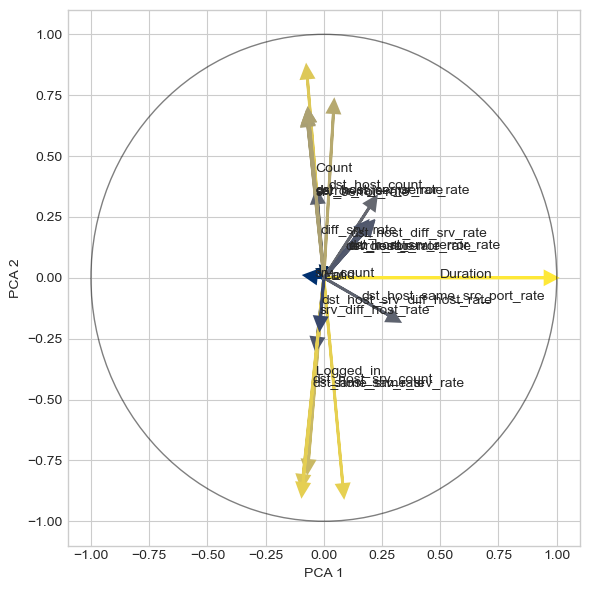

In [718]:
X=apply_pca(data_train,2)

applyCircleCorrelation(data_train, X)


In [719]:
data_train.columns

Index(['Duration', 'Land', 'Hot', 'Logged_in', 'Count', 'srv_count',
       'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')

### FGMPM : 

In [720]:
from tqdm import tqdm
import numpy as np
from scipy.stats import norm
import pandas as pd

class FGMPM_matrix:
    def __init__(self, origin_data, threshold):
        self.origin_data = origin_data
        self.threshold = threshold

    def calculate_feature_probabilities(self, values):
        probs = []
        for idx in range(len(self.origin_data.columns)):
            mean = np.array(self.origin_data.iloc[:, idx]).mean()
            std = np.array(self.origin_data.iloc[:, idx]).std()
            z_score = (values[idx] - mean) / std
            prob = (1 - norm.cdf(z_score)) * 100
            probs.append(prob)
        return probs

    def calculate_row_feature_probabilities(self, data):
        matrix = []
        for i in tqdm(range(len(data))):
            row = self.calculate_feature_probabilities(data.iloc[i, :])
            matrix.append(row)
        return matrix



# Create datasets :

![Texte alternatif](data_trans_fig2.png)


## **non normaliser**

### without pca 

#### with FGMPM

In [721]:

# fgmpm_instance = FGMPM_matrix(data_train, 50)
# d_row_probs_train = pd.DataFrame( fgmpm_instance.calculate_row_feature_probabilities(data_train))
# d_row_probs_test = pd.DataFrame( fgmpm_instance.calculate_row_feature_probabilities(data_test))

# fgmpm_instance_normal = FGMPM_matrix(data_train_normal, 50)
# d_row_probs_train_normal = pd.DataFrame( fgmpm_instance_normal.calculate_row_feature_probabilities(data_train_normal))


### with pca 

#### without FGMPM

In [722]:
components_num=14
d_raw_pca_train = apply_pca(data_train,14)

d_raw_pca_test = apply_pca(data_test, 14)

d_raw_pca_train_normal = apply_pca(data_train_normal, 14)

#### with FGMPM

In [723]:
# fgmpm_instance1 = FGMPM_matrix(d_raw_pca_train, 50)
# d_raw_pca_probs_train = pd.DataFrame( fgmpm_instance.calculate_row_feature_probabilities(d_raw_pca_train))
# d_raw_pca_probs_test = pd.DataFrame( fgmpm_instance.calculate_row_feature_probabilities(d_raw_pca_test))

# fgmpm_instance_normal_1 = FGMPM_matrix(d_raw_pca_train_normal, 50)
# d_raw_pca_probs_train = pd.DataFrame( fgmpm_instance.calculate_row_feature_probabilities(d_raw_pca_train_normal))

## **normaliser**

### without pca 

#### without FGMPM

In [724]:
d_norm_train = normalization(data_train)
d_norm_test = normalization(data_test)

d_norm_train_normal= normalization(data_train_normal)

In [725]:
data_train_normal

,Duration,Land,Hot,Logged_in,Count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,0.0,0.0,0.0,0.003914,0.018182,0.00,0.00,0.0,0.0,...,0.588235,0.098039,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
3,0.0,0.0,0.0,1.0,0.009785,0.045455,0.20,0.20,0.0,0.0,...,0.117647,1.000000,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0.0,0.0,0.0,1.0,0.058708,0.290909,0.00,0.00,0.0,0.0,...,1.000000,1.000000,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
12,0.0,0.0,0.0,1.0,0.005871,0.063636,0.00,0.00,0.0,0.0,...,0.031373,0.858824,1.00,0.00,0.12,0.03,0.00,0.00,0.00,0.00
16,0.0,0.0,0.0,1.0,0.015656,0.081818,0.00,0.11,0.0,0.0,...,0.356863,1.000000,1.00,0.00,0.01,0.02,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125963,0.0,0.0,0.0,1.0,0.005871,0.027273,0.00,0.00,0.0,0.0,...,1.000000,1.000000,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
125965,0.0,0.0,0.0,1.0,0.001957,0.009091,0.00,0.00,0.0,0.0,...,0.003922,0.007843,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00
125967,0.0,0.0,0.0,1.0,0.005871,0.100000,0.33,0.09,0.0,0.0,...,0.011765,1.000000,1.00,0.00,0.33,0.04,0.33,0.00,0.00,0.00
125970,0.0,0.0,0.0,1.0,0.001957,0.009091,0.00,0.00,0.0,0.0,...,1.000000,0.117647,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00


#### with FGMPM

In [726]:
# fgmpm_instance2 = FGMPM_matrix(d_norm_train, 50)

# d_norm_probs_train = pd.DataFrame( fgmpm_instance2.calculate_row_feature_probabilities(d_norm_train))

# d_norm_probs_test = pd.DataFrame( fgmpm_instance2.calculate_row_feature_probabilities(d_norm_test))


# # normal
# fgmpm_instance_normal_2 = FGMPM_matrix(d_norm_train_normal, 50)

# d_norm_probs_train_normal = pd.DataFrame( fgmpm_instance2.calculate_row_feature_probabilities(d_norm_train_normal))

### with pca 

#### without FGMPM

In [727]:
d_norm_pca_train = apply_pca(normalization(data_train),components_num)
d_norm_pca_test = apply_pca(normalization(data_test), components_num)
d_norm_pca_train_normal = apply_pca(normalization(data_train_normal),components_num)


In [728]:
d_norm_pca_train_normal.shape

(53600, 14)

In [729]:
d_norm_pca_train.shape


(102689, 14)

#### with FGMPM

In [682]:
# fgmpm_instance3 = FGMPM_matrix(d_norm_pca_train, 50)

# d_norm_probs_train = pd.DataFrame( fgmpm_instance3.calculate_row_feature_probabilities(d_norm_pca_train))

# d_norm_probs_test = pd.DataFrame( fgmpm_instance3.calculate_row_feature_probabilities(d_norm_pca_test))


# # normal
# fgmpm_instance_normal_3 = FGMPM_matrix(d_norm_pca_train_normal, 50)

# d_norm_pca_probs_train_noraml = pd.DataFrame( fgmpm_instance3.calculate_row_feature_probabilities(d_norm_pca_train_normal))

# **Models**

## Modeling :Functions

### GMM classique  

In [683]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

data_gmm = d_norm_train_normal
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(data_gmm)

GaussianMixture(n_components=2, random_state=42)

### GMM VOTING 

In [684]:
from sklearn.mixture import GaussianMixture
from math import sqrt
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import auc,roc_curve,f1_score,confusion_matrix
class GMMVoting():
    def __init__(self,nb_out):
        self.gmm = GaussianMixture(n_components=1, random_state=0)
        self.hasFit =  False
        self.nb_out = nb_out
        
    
    def fit(self,X):
        self.gmm.fit(X)
        self.means = self.gmm.means_[0]
        self.cov_mat = self.gmm.covariances_[0]
        self.hasFit = True

    def proba(self,a,b):
        return 1/(1+abs(b-a))
    
    
    def calculate_y_predict_proba(self,y_predict, y_test):
        # Utilisez LabelBinarizer pour convertir les étiquettes en un format binaire
        label_binarizer = LabelBinarizer()
        y_test_bin = label_binarizer.fit_transform(y_test)
        y_predict_bin = label_binarizer.transform(y_predict)

        # Obtenez les probabilités prédites
        y_predict_proba = np.zeros_like(y_predict_bin, dtype=float)

        for i in range(y_predict_bin.shape[1]):
            # Calcul des probabilités en divisant par le nombre total de prédictions positives pour chaque classe
            positive_predictions = np.sum(y_predict_bin[:, i])
            y_predict_proba[:, i] = y_predict_bin[:, i] / positive_predictions if positive_predictions > 0 else 0.0
        return y_predict_proba

    def predictOne(self,sample,mean_vector, covar, nb_out):
        if len(sample) != len(mean_vector):
            raise Exception("sample and vector must have same dimension")
        nb= 0
        n = len(sample)
        for  i in range(n):
            if (self.proba(sample[i],mean_vector[i])) < 1/(2*sqrt(covar[i][i])+1) :
                nb+=1
        return int(nb>= nb_out)
    
    def predict(self,X):
        if not self.hasFit:
            raise Exception("The model hasn't been fitted , please apply model.fit()")
        pred_value = []
        means = self.means
        cov_mat = self.cov_mat
        nb_out = self.nb_out
        values = pd.DataFrame(X).values.tolist()
        for i in range(X.shape[0]):
            pred_value.append(self.predictOne(values[i],means,cov_mat,nb_out))
        return pred_value
            
    def findBestNbOut(self,X_test,y_test,update_nb = True):
        sns.set_style("white")
        if not self.hasFit:
            raise Exception("The model hasn't been fitted , please apply model.fit(X)")
        save_nb = self.nb_out
        auc_max,nb_opt,f1_opt = 0 , 1,0
        plt.figure(figsize=(20, 15))
        for nb in range(1,len(self.means)+1):
            self.nb_out = nb
            pred_value = self.predict(X_test)
            y_pred_proba = self.calculate_y_predict_proba(pred_value, y_test)
            fpr_gmm,tpr_gmm,threshold_gmm = roc_curve(y_test, y_pred_proba)
            auc_gmm = auc(fpr_gmm, tpr_gmm)
            f1_sc = f1_score(y_test,pred_value)
            plt.plot(fpr_gmm,tpr_gmm,label=f'nb ={nb} AUC= {auc_gmm:.2f} f1-score = {f1_sc:.2f} ')
            if auc_gmm > auc_max :
                nb_opt = nb
                auc_max = auc_gmm
                f1_opt = f1_sc
        if not update_nb:
            self.nb_out = save_nb
        else:
            self.nb_out = nb_opt
        print(f"best nb_out has been found at nb_out = {nb_opt} with AUC = {auc_max:.2f},f1-score = {f1_opt:.2f} ")
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'GMM Voting , Best nb = {nb_opt}, AUC = {auc_max:.2f},f1-score = {f1_opt:.2f} ',fontsize=15)
        plt.legend(loc='lower right')
        plt.show()

    def show_confMatrix(self,X,y):
        X_test,y_test = X,y
        pred_value = self.predict(X_test)
        matrix_conf = confusion_matrix(y_test,pred_value)
        plt.imshow(matrix_conf)
        plt.title( f"confusion matrix GMMVoting nb_out = {self.nb_out}" )
        plt.colorbar()
        plt.show()

In [685]:
# GMM voting 

In [686]:
gmmvoting = GMMVoting(2)
gmmvoting.fit(d_norm_train_normal)

best nb_out has been found at nb_out = 2 with AUC = 0.87,f1-score = 0.88 


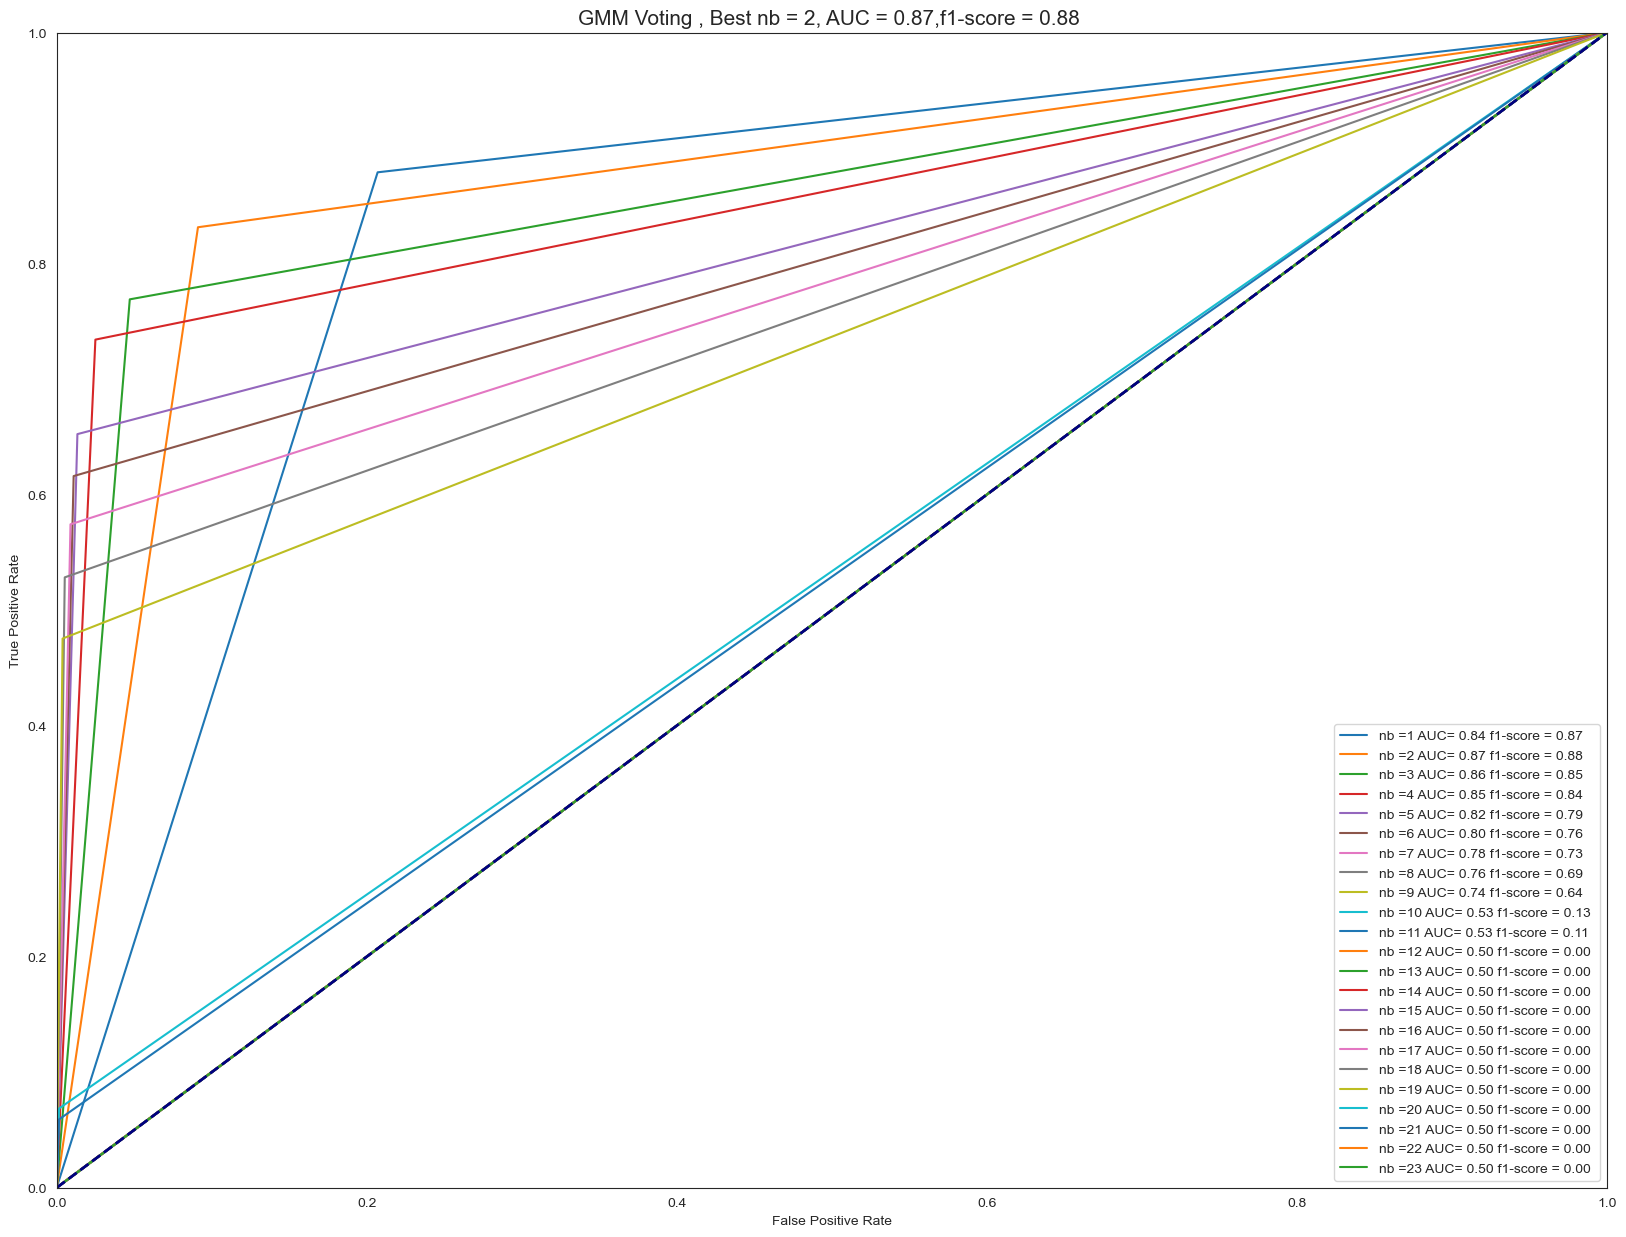

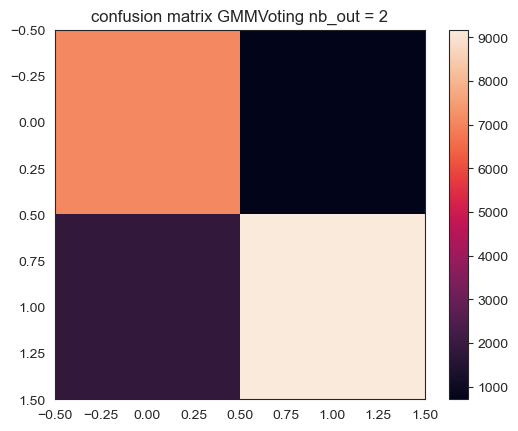

In [687]:
gmmvoting.findBestNbOut(d_norm_test,Y_test)
gmmvoting.show_confMatrix(d_norm_test,Y_test)

In [688]:
def plotVisual(df_pca ,tittle):
    palette = sns.color_palette('husl', n_colors=2)
    sns.scatterplot(data=df_pca,x="composante1",y="composante2",hue="cluster", palette=palette, edgecolor='k', marker='o', s=50)
    #     plt.scatter(pca_result[:, dimensions[0]], pca_result[:, dimensions[1]], alpha=0.7)
    plt.title(tittle)
    plt.legend(title='Cluster')
    plt.show()

In [689]:
palette = [sns.color_palette('husl', n_colors=2)[1],sns.color_palette('husl', n_colors=2)[0]]

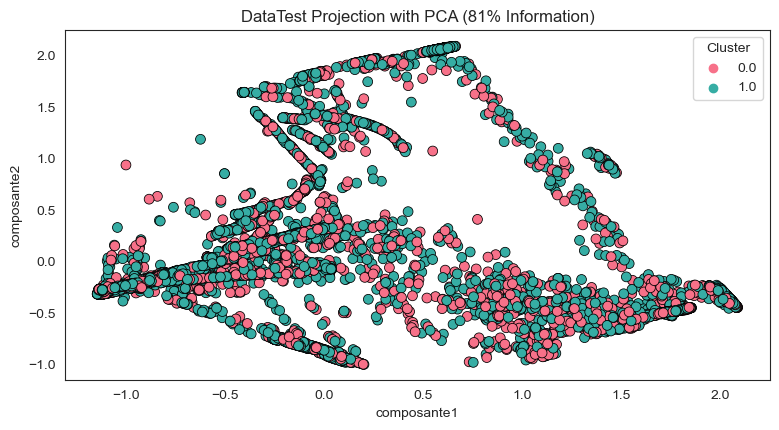

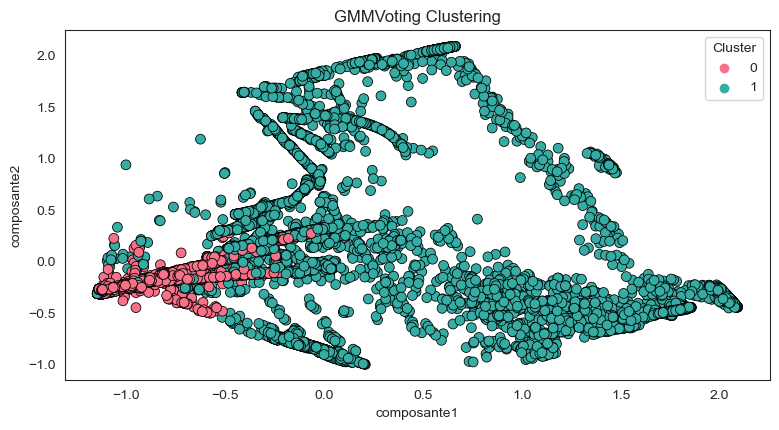

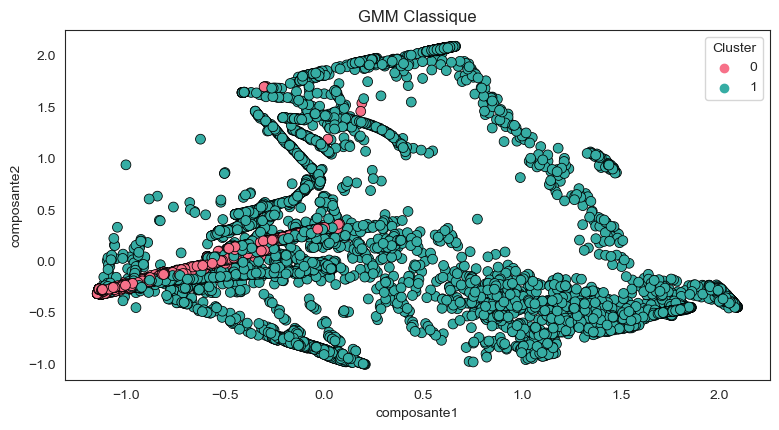

In [690]:
plt.figure(figsize=(20,10))

df_pca = d_norm_pca_test
df_pca =df_pca.rename({0:"composante1",1:"composante2"},axis=1)
plt.subplot(2,2,1)

df_pca["cluster"]=Y_test
plotVisual(df_pca,'DataTest Projection with PCA (81% Information)')
plt.figure(figsize=(20,10))
plt.subplot(2,2,2)
df_pca["cluster"]= gmmvoting.predict(d_norm_test)
plotVisual(df_pca,'GMMVoting Clustering')
plt.figure(figsize=(20,10))
plt.subplot(2,2,3)
df_pca["cluster"]= gmm.predict(d_norm_test)
plotVisual(df_pca,'GMM Classique')

## K_means :

In [700]:
data_train.shape


(102689, 14)

In [738]:
class KMeansClusteringModel:
    def __init__(self, n_clusters=2):
        self.n_clusters = n_clusters
        self.model = None

    def train(self, train_data):
        self.model = KMeans(n_clusters=self.n_clusters).fit(train_data)

    def predict(self, test_data):
        if self.model is None:
            raise RuntimeError("Model not trained. Call train() first.")

        preds = self.model.predict(test_data)
        return preds


In [739]:
kmeans_model = KMeansClusteringModel()
kmeans_model.train(data_train)
pred1 = kmeans_model.predict(data_test)

In [740]:
kmeans_model1 = KMeansClusteringModel()
kmeans_model1.train(d_norm_train)

pred2 = kmeans_model1.predict(d_norm_test)

In [741]:
kmeans_model2 = KMeansClusteringModel()
kmeans_model2.train(d_norm_train)

pred2 = kmeans_model2.predict(d_norm_test)

In [745]:
kmeans_model3 = KMeansClusteringModel()
kmeans_model3.train(d_raw_pca_train)

pred2 = kmeans_model3.predict(d_raw_pca_test)

In [743]:
kmeans_model4 = KMeansClusteringModel()
kmeans_model4.train(d_norm_pca_train)

pred2 = kmeans_model4.predict(d_norm_pca_test)

## k_means ( squared euclidean distances )

In [747]:
from sklearn.cluster import KMeans
from tqdm import tqdm

class KMeansDistanceClassifier:
    def __init__(self, model, threshold_dis=None):
        self.model = model
        self.threshold_dis = threshold_dis

    def k_means_distance(self, test_idx, test_data):
        c1 = np.array(test_data.iloc[test_idx, :])
        c2 = self.model.cluster_centers_[0]
        temp = c1 - c2
        euclid_dist = np.sqrt(np.dot(temp.T, temp))
        return euclid_dist

    def find_optimal_threshold_std_dev(self, train_data):
        distances = []
        for idx in tqdm(range(len(train_data))):
            dis = self.k_means_distance(idx, train_data)
            distances.append(dis)

        # Calculate mean and standard deviation
        mean_dist = np.mean(distances)
        std_dev_dist = np.std(distances)

        # Set threshold as mean + 2 * std_dev
        self.threshold_dis = mean_dist + 2 * std_dev_dist
        print(f"Optimal threshold using Standard Deviation: {self.threshold_dis}")

    def predict(self, test_data):
        if self.threshold_dis is None:
            raise ValueError("Threshold not set. Call find_optimal_threshold_std_dev first.")

        kmd_preds = []
        for idx in tqdm(range(len(test_data))):
            dis = self.k_means_distance(idx, test_data)
            if dis > self.threshold_dis:
                kmd_preds.append(1)
            else:
                kmd_preds.append(0)
        return kmd_preds
kmeans = KMeans(n_clusters=2, random_state=0).fit(data_train_normal)

In [749]:
kmd_classifier = KMeansDistanceClassifier(kmeans)
kmd_classifier.find_optimal_threshold_std_dev(data_train_normal)

predictions = kmd_classifier.predict(data_test)

100%|██████████| 53600/53600 [00:10<00:00, 5113.57it/s]


Optimal threshold using Standard Deviation: 1.7574211097809174


100%|██████████| 18880/18880 [00:03<00:00, 5613.63it/s]


In [751]:
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(d_raw_pca_train_normal)
kmd_classifier2 = KMeansDistanceClassifier(model=kmeans, threshold_dis=1.88)

kmd_data_pca_preds = kmd_classifier2.predict(d_raw_pca_test)

100%|██████████| 18880/18880 [00:02<00:00, 7549.44it/s]


In [750]:
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(d_norm_train_normal)
kmd_classifier3 = KMeansDistanceClassifier(model=kmeans, threshold_dis=1.88)

# Make predictions on the test data
kmd_data_norm_preds = kmd_classifier3.predict(d_norm_test)

100%|██████████| 18880/18880 [00:03<00:00, 4819.00it/s]


In [752]:
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(d_norm_pca_train_normal)
# Create an instance of KMeansDistanceClassifier
kmd_classifier4 = KMeansDistanceClassifier(model=kmeans, threshold_dis=1.88)

# Make predictions on the test data
kmd_data_norm_pca_preds = kmd_classifier4.predict(d_norm_pca_test)

100%|██████████| 18880/18880 [00:02<00:00, 7882.27it/s]


# DBSCAN : 

In [ ]:
from sklearn.cluster import DBSCAN

In [769]:
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

class MyDBSCAN:
    def __init__(self, eps, min_samples):
        self.eps = eps
        self.min_samples = min_samples
        self.labels = None

    def fit(self, data):
        self.labels = np.zeros(len(data))  # Initialize labels
        cluster_id = 0

        for i in range(len(data)):
            if self.labels[i] != 0:  # Skip if already assigned to a cluster
                continue

            neighbors = self._find_neighbors(data, i)

            if len(neighbors) >= self.min_samples:
                cluster_id += 1
                self.labels[i] = cluster_id
                self._assign_cluster(data, neighbors, cluster_id)

    def predict(self, data_test):
        if self.labels is None:
            raise ValueError("Model not fitted. Call fit() first.")

        test_labels = np.zeros(len(data_test))

        for i in range(len(data_test)):
            neighbors = self._find_neighbors(data_test, i)

            if len(neighbors) < self.min_samples:
                test_labels[i] = -1  # Assign noise label
            else:
                test_labels[i] = self.labels[neighbors[0]]  # Assign the cluster label of the first neighbor

        return test_labels

    
    def get_labels(self):
        return self.labels


In [ ]:
import pandas as pd

# Assume you have your data in a DataFrame X
# and you want to cluster it using DBSCAN with epsilon=1.0 and min_samples=5
dbscan = MyDBSCAN(eps=1.0, min_samples=5)


# Fit the model to the training data
dbscan.fit(d_norm_train_normal)

# Predict cluster labels for the test data
test_labels = dbscan.predict(d_norm_test)



# Evaluation : 

In [756]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

def evaluate_anomaly_detection_model_metrics(classifier, test_data, true_labels):
    predictions = classifier.predict(test_data)
    conf_matrix = confusion_matrix(true_labels, predictions)
    TN, FP, FN, TP = conf_matrix.ravel()
    sensitivity = TP / (TP + FN)
    B = (TP + FP) / (TN + FP + FN + TP)
    precision, recall, f1_score, _ = precision_recall_fscore_support(true_labels, predictions, average='binary')
    print(f"Sensitivity: {sensitivity}")
    print(f"Attack Percentage (B): {B}")
    print(f"F1 Score: {f1_score}")

    return sensitivity, B,  f1_score

In [757]:
sensitivity, attack_percentage, f1_score = evaluate_anomaly_detection_model_metrics(gmmvoting, d_norm_test, Y_test)
sensitivity, attack_percentage, f1_score = evaluate_anomaly_detection_model_metrics(kmd_classifier3, d_norm_test, Y_test)

Sensitivity: 0.8315818082986048
Attack Percentage (B): 0.5240466101694915
F1 Score: 0.8770303841008982


100%|██████████| 18880/18880 [00:04<00:00, 4710.76it/s]

Sensitivity: 0.6486682369994564
Attack Percentage (B): 0.3861758474576271
F1 Score: 0.7812755742266354
